In [150]:
from pprint import pprint

alphabet_num = {}
alphabet = 'a-b-c-d-e-f-g-h-i-j-k-l-m-n-o-p-q-r-s-t-u-v-w-x-y-z-,-.-'.split('-')
base_freq = 262 #hz
note_freqs = {alphabet[2*i]: base_freq * pow(2,(i/12)) for i in range(14)}
note_freqs['b'] = 0
note_freqs['d'] = 0
note_freqs['f'] = 0
note_freqs['h'] = 0
note_freqs['j'] = 0
note_freqs['l'] = 0
note_freqs['n'] = 0
note_freqs['p'] = 0
note_freqs['r'] = 0
note_freqs['t'] = 0
note_freqs['v'] = 0
note_freqs['x'] = 0
note_freqs['z'] = 0
note_freqs['.'] = 0
pprint(note_freqs)


{',': 555.1586614442707,
 '.': 0,
 'a': 262.0,
 'b': 0,
 'c': 277.57933072213535,
 'd': 0,
 'e': 294.0850566570557,
 'f': 0,
 'g': 311.5722641307129,
 'h': 0,
 'i': 330.09931507245676,
 'j': 0,
 'k': 349.728041792549,
 'l': 0,
 'm': 370.52395334175094,
 'n': 0,
 'o': 392.55645414169055,
 'p': 0,
 'q': 415.8990756156682,
 'r': 0,
 's': 440.6297215929464,
 't': 0,
 'u': 466.8309283055378,
 'v': 0,
 'w': 494.59013984520743,
 'x': 0,
 'y': 524.0,
 'z': 0}


In [151]:
poet = 'The Road Not Taken by Robert Frost Two roads diverged in a yellow wood And sorry I could not travel both And be one traveler, long I stood And looked down one as far as I could To where it bent in the undergrowth Then took the other, as just as fair And having perhaps the better claim, Because it was grassy and wanted wear Though as for that, the passing there Had worn them really about the same,'
poet = poet.lower().split(" ")
pprint(poet)

['the',
 'road',
 'not',
 'taken',
 'by',
 'robert',
 'frost',
 'two',
 'roads',
 'diverged',
 'in',
 'a',
 'yellow',
 'wood',
 'and',
 'sorry',
 'i',
 'could',
 'not',
 'travel',
 'both',
 'and',
 'be',
 'one',
 'traveler,',
 'long',
 'i',
 'stood',
 'and',
 'looked',
 'down',
 'one',
 'as',
 'far',
 'as',
 'i',
 'could',
 'to',
 'where',
 'it',
 'bent',
 'in',
 'the',
 'undergrowth',
 'then',
 'took',
 'the',
 'other,',
 'as',
 'just',
 'as',
 'fair',
 'and',
 'having',
 'perhaps',
 'the',
 'better',
 'claim,',
 'because',
 'it',
 'was',
 'grassy',
 'and',
 'wanted',
 'wear',
 'though',
 'as',
 'for',
 'that,',
 'the',
 'passing',
 'there',
 'had',
 'worn',
 'them',
 'really',
 'about',
 'the',
 'same,']


In [152]:
def get_freq(ls):
    for i in ls:
        freqs.append(note_freqs[i])
    return freqs

In [153]:
music_notes = [[] for _ in range(len(poet))]
for idx, word in enumerate(poet):
    for letter in word:
        music_notes[idx].append(letter)
music_notes

[['t', 'h', 'e'],
 ['r', 'o', 'a', 'd'],
 ['n', 'o', 't'],
 ['t', 'a', 'k', 'e', 'n'],
 ['b', 'y'],
 ['r', 'o', 'b', 'e', 'r', 't'],
 ['f', 'r', 'o', 's', 't'],
 ['t', 'w', 'o'],
 ['r', 'o', 'a', 'd', 's'],
 ['d', 'i', 'v', 'e', 'r', 'g', 'e', 'd'],
 ['i', 'n'],
 ['a'],
 ['y', 'e', 'l', 'l', 'o', 'w'],
 ['w', 'o', 'o', 'd'],
 ['a', 'n', 'd'],
 ['s', 'o', 'r', 'r', 'y'],
 ['i'],
 ['c', 'o', 'u', 'l', 'd'],
 ['n', 'o', 't'],
 ['t', 'r', 'a', 'v', 'e', 'l'],
 ['b', 'o', 't', 'h'],
 ['a', 'n', 'd'],
 ['b', 'e'],
 ['o', 'n', 'e'],
 ['t', 'r', 'a', 'v', 'e', 'l', 'e', 'r', ','],
 ['l', 'o', 'n', 'g'],
 ['i'],
 ['s', 't', 'o', 'o', 'd'],
 ['a', 'n', 'd'],
 ['l', 'o', 'o', 'k', 'e', 'd'],
 ['d', 'o', 'w', 'n'],
 ['o', 'n', 'e'],
 ['a', 's'],
 ['f', 'a', 'r'],
 ['a', 's'],
 ['i'],
 ['c', 'o', 'u', 'l', 'd'],
 ['t', 'o'],
 ['w', 'h', 'e', 'r', 'e'],
 ['i', 't'],
 ['b', 'e', 'n', 't'],
 ['i', 'n'],
 ['t', 'h', 'e'],
 ['u', 'n', 'd', 'e', 'r', 'g', 'r', 'o', 'w', 't', 'h'],
 ['t', 'h', 'e', 'n'],


In [154]:
import numpy as np
from scipy.io.wavfile import write
from scipy import signal
import os

samplerate = 44100 #Frequecy in Hz

def get_cubicwave(chords, duration=0.5):
    '''
    Function takes the "frequecy" and "time_duration" for a wave 
    as the input and returns a "numpy array" of values at all points 
    in time
    '''
    
    amplitude = 4096
    t = np.linspace(0, duration, int(samplerate * duration))
    # wave = amplitude * (np.sin(2 * np.pi * freq * t) + np.cos(2 * np.pi * freq * t))
    # wave = signal.sawtooth(np.sin(2 * np.pi * freq * t))
    wave = 0
    for i in chords:
        wave += amplitude * signal.cubic(np.sin(2 * np.pi * i * t)) 
    noise = np.random.uniform(-1, 1, len(t))*1
    wave += noise
    return wave

In [155]:
freqs = [[] for _ in range(len(music_notes))]
for idx, values in enumerate(music_notes):
    for value in values: 
        freqs[idx].append(note_freqs[value])

In [156]:
def get_song_data(music_notes):
    
    song = []
    for i, note in enumerate(music_notes):
        song.append(get_cubicwave(note, duration=0.5))
    song = np.concatenate(song)
    return song

data = get_song_data(freqs)
data = data * (16300/np.max(data))

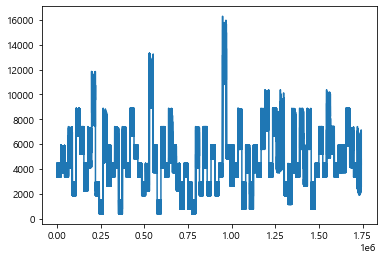

In [157]:
plt.plot(data)

In [158]:
write('poet.wav', samplerate, data.astype(np.int16))
# play wav file
os.system("poet.wav")

0